# Pair Programming EDA - Regresión Logística


Para los ejercicios de pair programming de Regresión logística temdremos que buscar un dataset (al igual que hicismos en regresión lineal) que usaremosmos a lo largo de los siguientes ejercicios.

**Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.**

In [89]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import sidetable as stb
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [15]:
#abrimos el CSV:

df = pd.read_csv('datos/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado.


### Características de las columnas del DF:

This data set contains the following features. [Fuente del dataset](https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd):

- 'User ID': unique identification for consumer  
- 'Age': cutomer age in years  
- 'Estimated Salary': Avg. Income of consumer  
- 'Gender': Whether consumer was male or female  
- 'Purchased': 0 or 1 indicated clicking on Ad  

##### - Buscad un conjunto de datos a analizar. Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico.


##### - Realizar un EDA sencillo poniendo en práctica los conocimientos adquiridos hasta el momento. Interpretad los resultados.


In [16]:
#extraemos información del df:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Observamos que el DF cuenta con variables numéricas y una categórica (género).   

**Utilizaremos como VD/VR la variable 'Purchased'.**  

Es decir, si una persona ha pulsado el anuncio o no.

In [122]:

#renombramos las columnas para facilitar el manejo de la información:
new_cols= {col: col.replace(" ", "_").lower() for col in df.columns}
#una vez almacenados, aplicamos .rename()
df.rename(columns = new_cols, inplace = True)

#comprobamos:

df.columns

#guardamos en un csv el nombre modificado:

df.to_csv('datos/Social_Network_Ads_1.csv', index=False)

In [18]:
#tamaño de la muestra:

print(f'Tenemos {df.shape[0]} casos y {df.shape[1]} columnas.')

#vemos que no hay nulos en la tercera columna, así que exploraremos los duplicados:

print(f'Tenemos un total de {df.duplicated().sum()} casos duplicados.')



Tenemos 400 casos y 5 columnas.
Tenemos un total de 0 casos duplicados.


In [19]:
#valores únicos. vamos a omitir la columna de User ID dado que cada valor es único y no nos dejaría ver los valores del resto de variables.
df_col_no_id = ['gender', 'age', 'estimatedsalary', 'purchased']

for x in df_col_no_id:
    print(f'Los valores únicos de {x.upper()} son:')
    print(df[x].unique())

Los valores únicos de GENDER son:
['Male' 'Female']
Los valores únicos de AGE son:
[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
Los valores únicos de ESTIMATEDSALARY son:
[ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77

In [127]:
#frecuencias de las variables:

for x in df_col_no_id:
    print(f'Las frecuencias de {x.upper()} son:\n{df[x].value_counts()}')

Las frecuencias de GENDER son:
Female    204
Male      196
Name: gender, dtype: int64
Las frecuencias de AGE son:
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: age, dtype: int64
Las frecuencias de ESTIMATEDSALARY son:
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: estimatedsalary, Length: 117, dtype: int64
Las frecuencias de PURCHASED son:
0    257
1    143
Name: purchased, dtype: int64


Frecuencias en % de la variable dependiente o respuesta ('Purchased'):

In [120]:
round(df['purchased'].value_counts(lambda x: x.sum()/x.shape[0]),2)

0    0.64
1    0.36
Name: purchased, dtype: float64

Vemos que la posición de la muestra en nuestra VD/VR tiende claramente a no haber pulsado el botón.

#### Estadísticos principales de las variables:

In [109]:
#de las variables numéricas
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
user_id,400.0,15691539.76,71658.32,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
age,400.0,37.66,10.48,18.0,29.75,37.0,46.0,60.0
estimatedsalary,400.0,69742.50,34096.96,15000.0,43000.00,70000.0,88000.0,150000.0
purchased,400.0,0.36,0.48,0.0,0.00,0.0,1.0,1.0


In [111]:
#de la variable categórica, gender
df.describe(include='object').T

,count,unique,top,freq
gender,400,2,Female,204


In [112]:
#calculamos la moda para poder interpretar los datos correctamente:
for col in df_col_no_id:
    print(f'La moda de {col.capitalize()} es:')
    print(df[col].mode())
    print('-----------------------------')

La moda de Gender es:
0    Female
dtype: object
La moda de Age es:
0    35
dtype: int64
La moda de Estimatedsalary es:
0    72000
dtype: int64
La moda de Purchased es:
0    0
dtype: int64


#### Interpretación de los datos:

No podemos interpretar user_id ya que son valores únicos.

- *estimatedsalary o salario estimado*: vemos que la media (69742.50) está muy separada del valor mínimo (15000). Además, la desviación típica es casi la mitad del valor de la media (34096.96), lo que nos indica una gran dispersión en los salarios. La mediana o percentil 50 está ligeramente por encima de la media (70000). 

Por lo tanto, hay muchas puntuaciones que están por encima de la media.

- *age*: la media (37.66) está muy cercana a la mediana (37), y también de la moda (35), lo que nos indica una distribución bastante cercana a la simetría. la desviación típica es de 10.48 años, lo que nos indica que la edad también presenta puntuaciones dispersas.

- *gender*: Existe paridad de género en la muestra, donde predominan muy ligeramente las mujeres (204).

- *purchased*: Nuestra variable dependiente o respuesta. Al ser una variable dicotómica, solamente podemos interpretar la moda. La moda es 0 = no ha dado click al anuncio. Por lo tanto, podemos decir que en la muestra predominan lxs clientes que no han dado click en el anuncio.

**Conclusión:**
Contamos con una muestra muy diversa en edad y salarios, con una distribución igualitaria de hombres y mujeres que tienden a no dar click en el anuncio.


### Exploración de los outliers:

In [63]:
#creamos un df con solo las variables numéricas para valorar los outliers
numericas = df.select_dtypes(include=np.number)

#eliminamos la columna del id
numericas.drop('user_id', axis=1, inplace=True)

#comprobamos el cambio
numericas.head()

,age,estimatedsalary,purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Representación gráfica de los outliers:

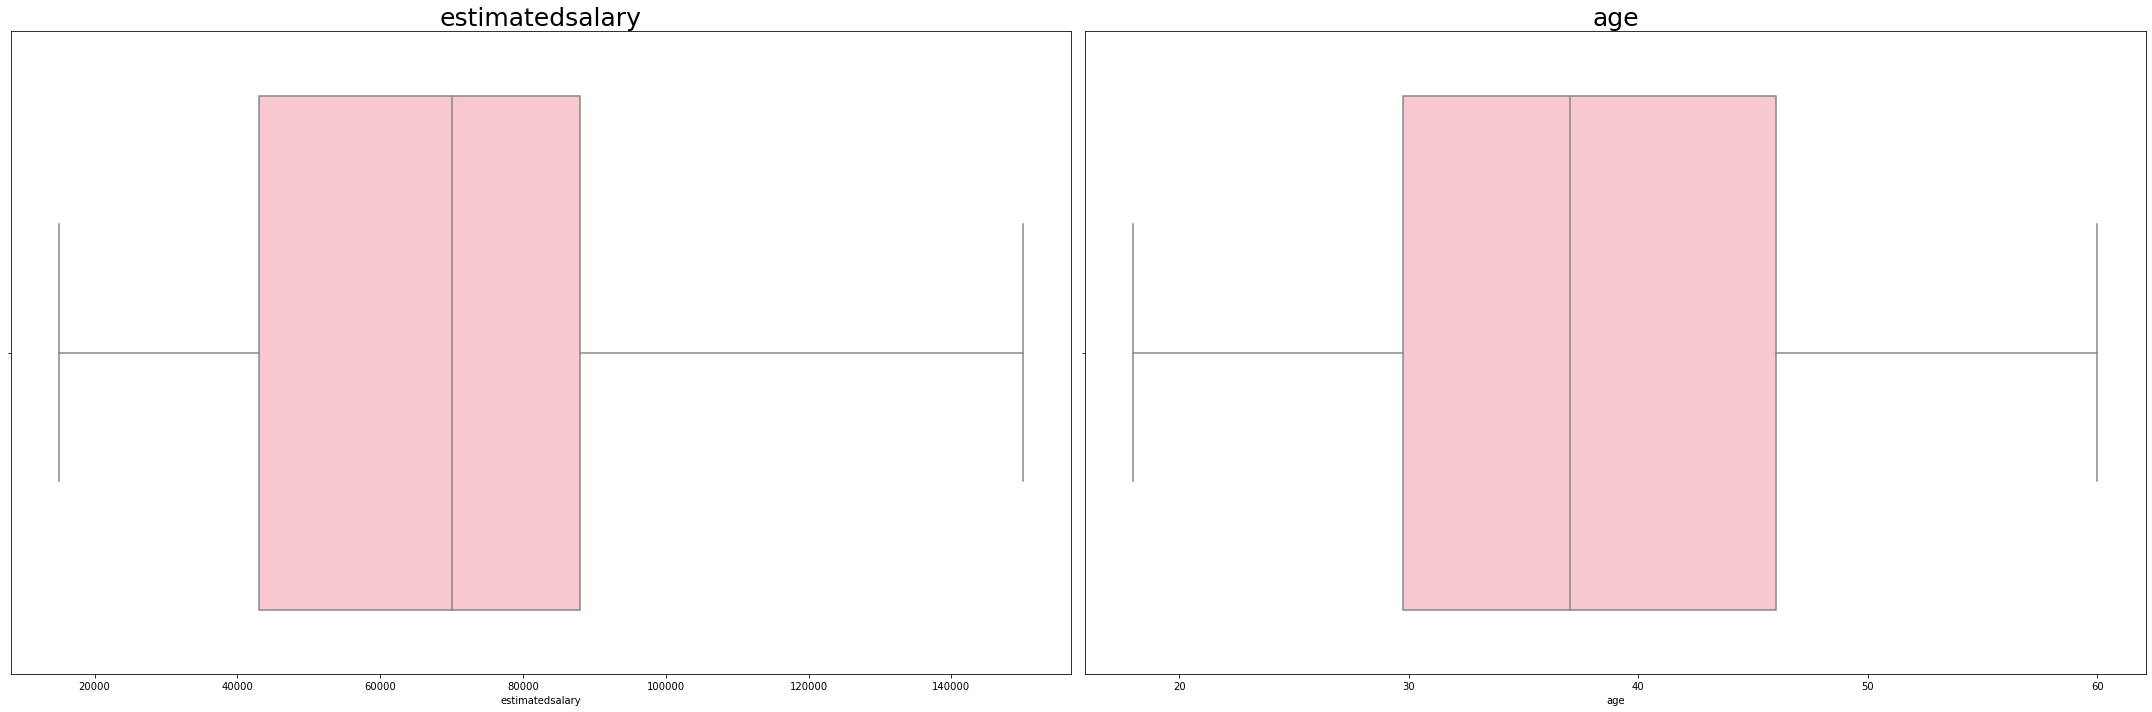

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(30,10))

axes = axes.flat

#creamos una lista sin 'purchased' ya que no nos interesa incluir purchased, ya que es dicotómica
lista_numericas = ['estimatedsalary', 'age']

for index, col in enumerate(lista_numericas):
    sns.boxplot(x = numericas[col], data=numericas, ax=axes[index], color='pink');
    axes[index].set_title(col, fontsize=25)

fig.tight_layout();

**Interpretación**:  

No tenemos outliers. 

- *salario estimado (dcha.)*: Vemos que los bigotes en esta columna son amplios, lo que nos indica que hay muchos valores que se quedan fuera del rango intercuartílico. Además, la mediana está varada hacia la derecha, corroborando que existen muchos casos con salarios estimados muy altos.

- *edad (izqda.)*: La mediana está varada, en este caso, hacia la izquierda, estableciéndose en torno a los 37. Como hemos visto, la media y la mediana son ambas 37, y la moda 35. por lo tanto, la distribución de las edades en la muestra es muy cercana a la simetría.